# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


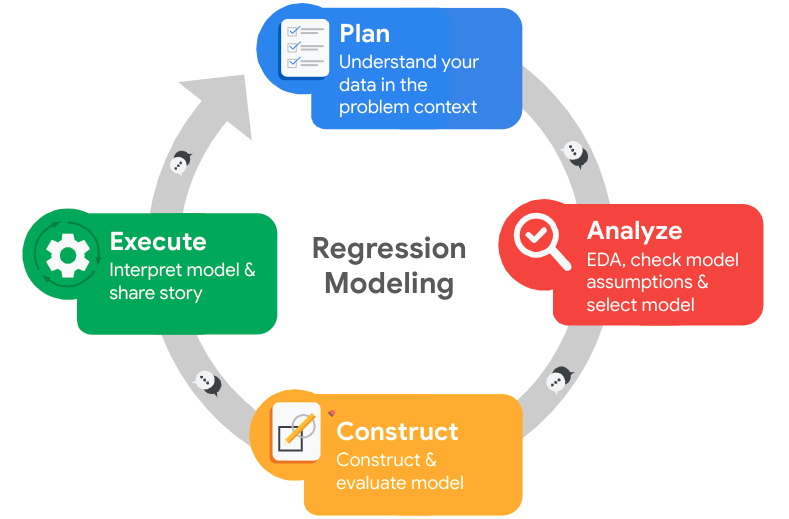

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# first identify what to do with data. 
# Manipulation: read, feature engineering, displaying required columns, etc 
## so pandas and numpy
# now for EDA, (visualisation, trends in predictors, graphs)
## matplotlib,seaborn
# now fitting, selecting modelling, training the model, spliting into learning and testing sets
## xgboost (sequential models that implement boosting, i.e minimise residuals from previous)
## sklearn 
# now for data evaluation (metrics and functions)
## sklearn modules
# saving modules
## pickling

In [2]:
# Import packages
### YOUR CODE HERE ### 

#Manipulation
import numpy as np
import pandas as pd

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#Display cols in df
pd.set_option('display.max_columns', None)

#Modeling

from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#Metrics and helpful funcations

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

#Saving Model
import pickle

In [3]:
# RUN THIS CELL TO IMPORT DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
(descriptive statistics about vars, like mean std, etc)
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
### YOUR CODE HERE ###

df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Gather descriptive statistics about the data

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed
### YOUR CODE HERE ###
df0=df0.rename(columns={'satisfaction_level' : 'satisfaction', 'last_evaluation': 'eval', 'number_project': 'involvements','time_spend_company': 'tenure', 'average_montly_hours' : 'hours_logg'})

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction', 'eval', 'involvements', 'hours_logg', 'tenure',
       'Work_accident', 'left', 'promotion_last_5years', 'Department',
       'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
### YOUR CODE HERE ###
df0.isnull()
df0.isnull().sum()

satisfaction             0
eval                     0
involvements             0
hours_logg               0
tenure                   0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [10]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[(df0.duplicated())]

satisfaction  eval  involvements  hours_logg  tenure  Work_accident  \
396            0.46  0.57             2         139       3              0   
866            0.41  0.46             2         128       3              0   
1317           0.37  0.51             2         127       3              0   
1368           0.41  0.52             2         132       3              0   
1461           0.42  0.53             2         142       3              0   
...             ...   ...           ...         ...     ...            ...   
14994          0.40  0.57             2         151       3              0   
14995          0.37  0.48             2         160       3              0   
14996          0.37  0.53             2         143       3              0   
14997          0.11  0.96             6         280       4              0   
14998          0.37  0.52             2         158       3              0   

       left  promotion_last_5years  Department  salary  
396       1                      0       sales     low  
866       1                      0  accounting     low  
1317      1                      0       sales  medium  
1368      1                      0       RandD     low  
1461      1                      0       sales     low  
...     ...                    ...         ...     ...  
14994     1                      0     support     low  
14995     1                      0     support     low  
14996     1                      0     support     low  
14997     1                      0     support     low  
14998     1                      0     support     low  

[3008 rows x 10 columns]

In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###

df1 = df0.drop_duplicates(keep='first')
# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.describe()



satisfaction          eval  involvements    hours_logg        tenure  \
count  11991.000000  11991.000000  11991.000000  11991.000000  11991.000000   
mean       0.629658      0.716683      3.802852    200.473522      3.364857   
std        0.241070      0.168343      1.163238     48.727813      1.330240   
min        0.090000      0.360000      2.000000     96.000000      2.000000   
25%        0.480000      0.570000      3.000000    157.000000      3.000000   
50%        0.660000      0.720000      4.000000    200.000000      3.000000   
75%        0.820000      0.860000      5.000000    243.000000      4.000000   
max        1.000000      1.000000      7.000000    310.000000     10.000000   

       Work_accident          left  promotion_last_5years  
count   11991.000000  11991.000000           11991.000000  
mean        0.154282      0.166041               0.016929  
std         0.361234      0.372133               0.129012  
min         0.000000      0.000000               0.000000  
25%         0.000000      0.000000               0.000000  
50%         0.000000      0.000000               0.000000  
75%         0.000000      0.000000               0.000000  
max         1.000000      1.000000               1.000000

### Check Distribution, scatterplots, heatmaps, outliers

Check for outliers in the data. (BOX plot best) because its important to make a choice in model building

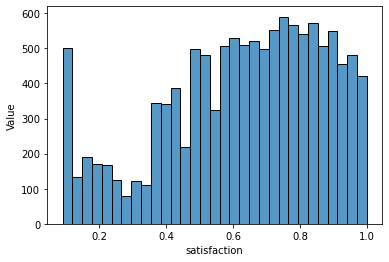

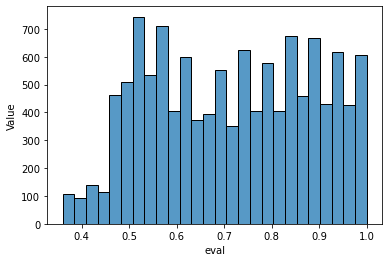

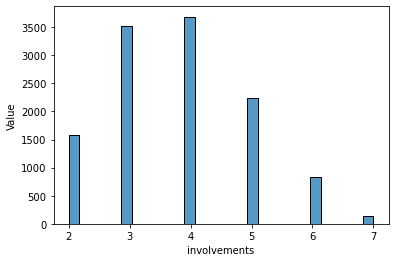

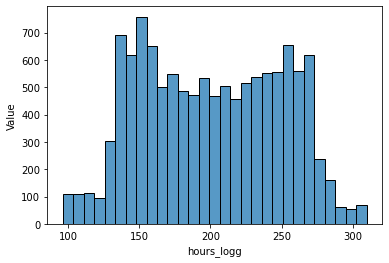

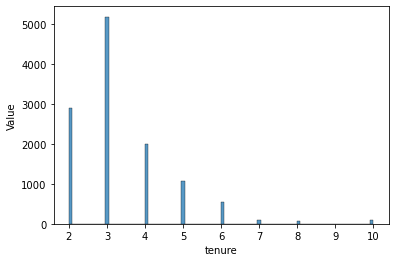

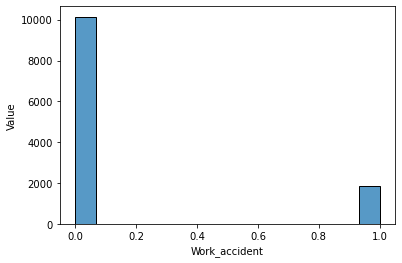

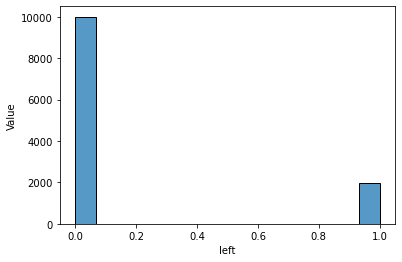

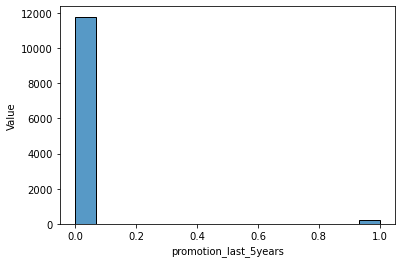

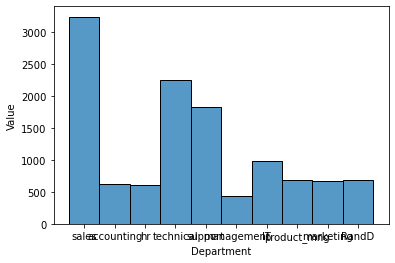

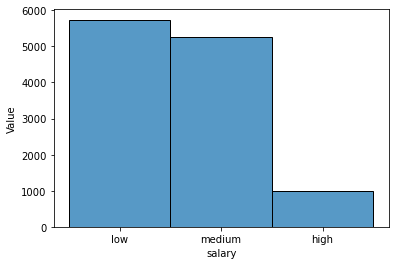

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###

def plot_histograms_boxplots(dataframe):
    for col in dataframe.columns:
        sns.histplot(x=col, data=df1)
        #sns.boxplot(x=col, data=df1)
        plt.xlabel(col)
        plt.ylabel("Value")
        plt.show()
        
plot_histograms_boxplots(df1.copy())
#plt.title("Distribution of Tenure in the Dataframe")
#plt.show()

In [13]:
# Interquartile Range: 
## Q1 = median (of lower half of sorted tenure column)
## Q3 = median (of upper half of sorted tenure column)

# Calculate IQR Q3 - Q1

In [14]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

q1 = df1['tenure'].quantile(0.25)
q3 = df1['tenure'].quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

outlier_rows = df1[(df1['tenure'] < lower_limit) | (df1['tenure'] > upper_limit)]

print (len(outlier_rows))

824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [15]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
num_stayed = sum(df1['left'] == 0)
num_left = sum(df1['left'] == 1)
num_tot = 11991
# Get percentages of people who left vs. stayed

perc_stayed = num_stayed/num_tot
perc_left = 1 - perc_stayed
### YOUR CODE HERE ###
#num_stayed
print(perc_stayed, perc_left)

0.8339588024351597 0.16604119756484026


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

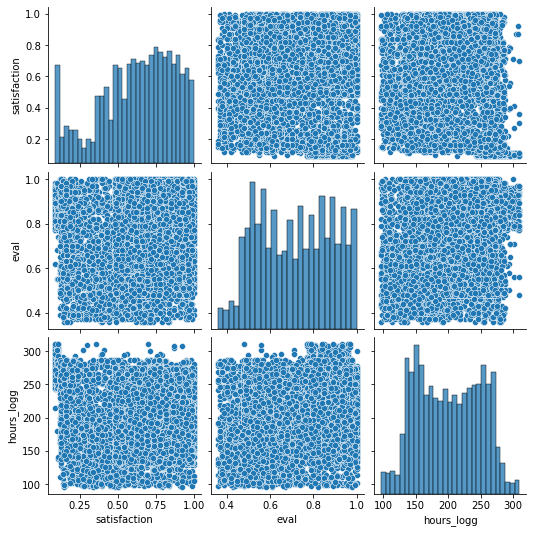

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###

conti_cols =["satisfaction", "eval", "hours_logg"]

sns.pairplot(df1[conti_cols])#,hue="left")
plt.show()

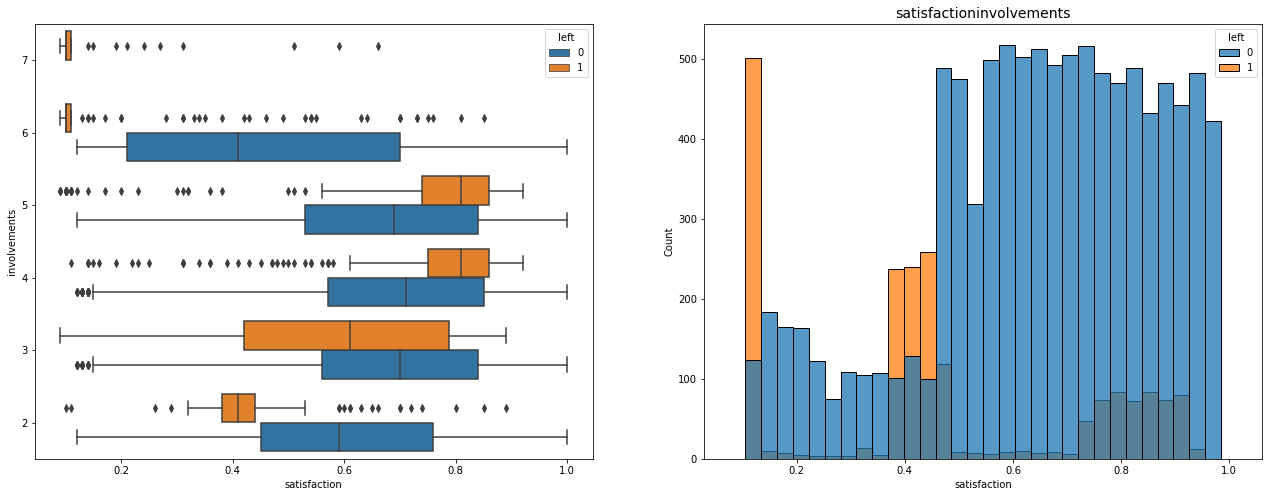

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###

## a general function (helper) that can be used to gen boxplot and hists of 2 vars
## remember, we want to see individial relationships like above
## but also 3 way relationships (outcome on a third axis, color coded)

def box_hist_pair(X_var, Y_var):
    #set fig and axes
    fig,ax = plt.subplots(1,2, figsize = (22,8))
    #create boxplots
    sns.boxplot(data=df1, x=X_var, y=Y_var, hue='left', orient="h", ax=ax[0])
    ax[0].invert_yaxis()
    #create hists
    frac_Y_stay = df1[df1['left']==0][Y_var]
    frac_X_stay = df1[df1['left']==1][X_var]
    sns.histplot(data=df1, x=X_var, hue='left', multiple = 'dodge', shrink=2,ax=ax[1])
    ax[1].set_title(X_var+Y_var,fontsize='14')
    plt.show()

box_hist_pair('satisfaction','involvements')
## Want to identify how satisfaction and number_of_projects and Left are related




Involvements and Satisfaction boxplots tell that less satisfied people are those involved in 6 or more projects. As involvements are reduced satisfactions start to be better. There are a few outliers in this case. 
Histplot tells count of less satisfied who left is way more than other . theres a population of lefts at around 0.3 to 0.5. Then theres a population around highly satisfied custs too (these are probably the ones who found a better salary, etc and resigned). 

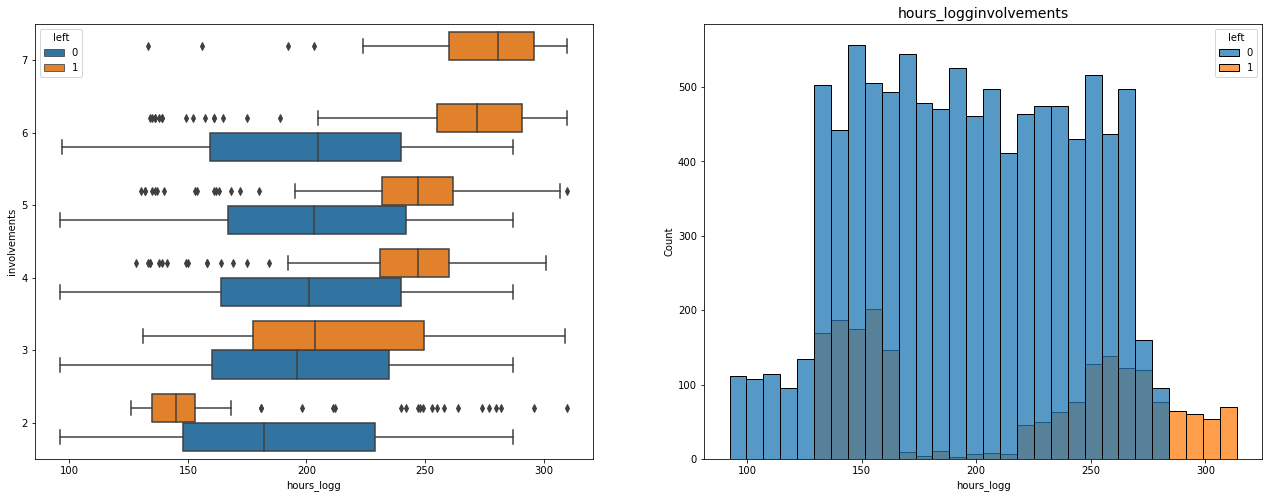

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
box_hist_pair('hours_logg', 'involvements')

employees with 6 or more projs 'left' compared to ones with lower proj involvments. (LEFT because Overworked most likely). second is those people who worked less hence left. (probably kicked out for less work).

hisplots. One group of people with high hours left, and second group of people who worked less henced kicked out.

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###
df1.head(2)

satisfaction  eval  involvements  hours_logg  tenure  Work_accident  left  \
0          0.38  0.53             2         157       3              0     1   
1          0.80  0.86             5         262       6              0     1   

   promotion_last_5years Department  salary  
0                      0      sales     low  
1                      0      sales  medium

from tenure hist, most people left on or before 6 years completion. What company ploicy might be impactful on this?

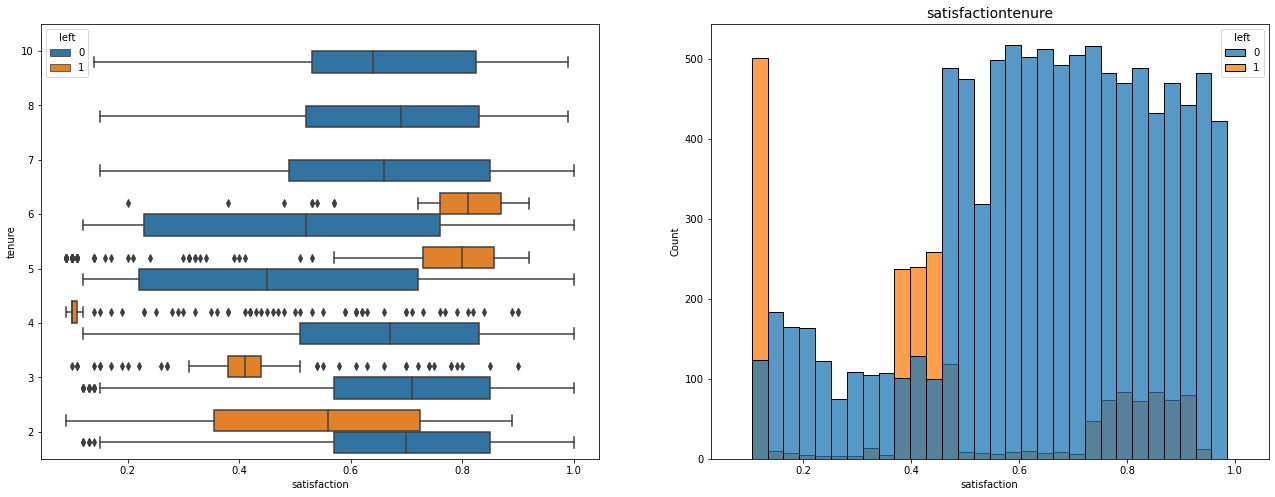

In [24]:
# Create a plot as needed
### YOUR CODE HERE ###
box_hist_pair('satisfaction','tenure')

for first, 2 kinds left: low satisfaction(<0.4), short tenure (<=4). high satisfaction, not a short tenure(>4).

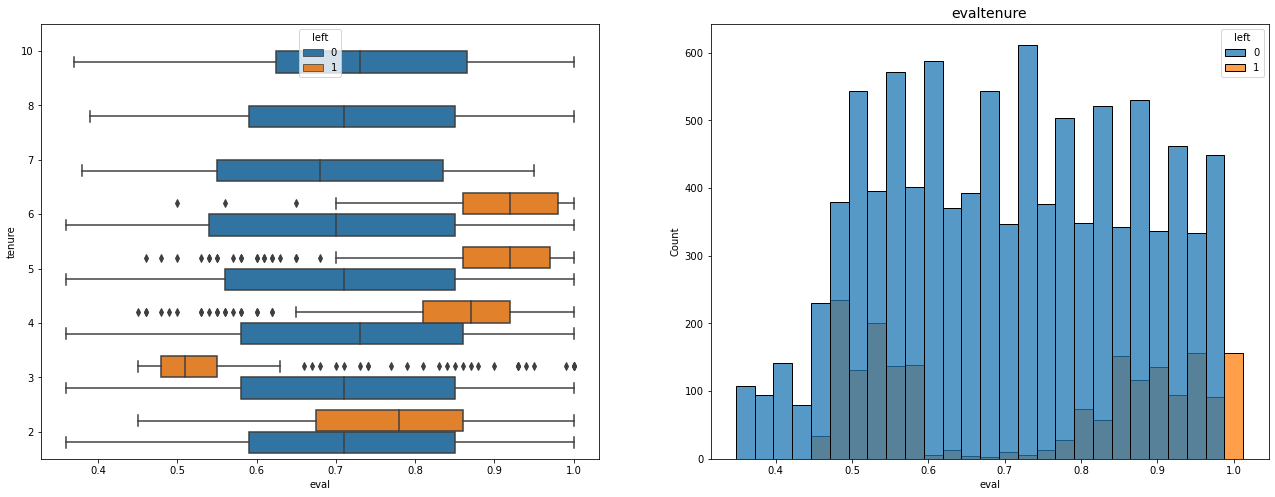

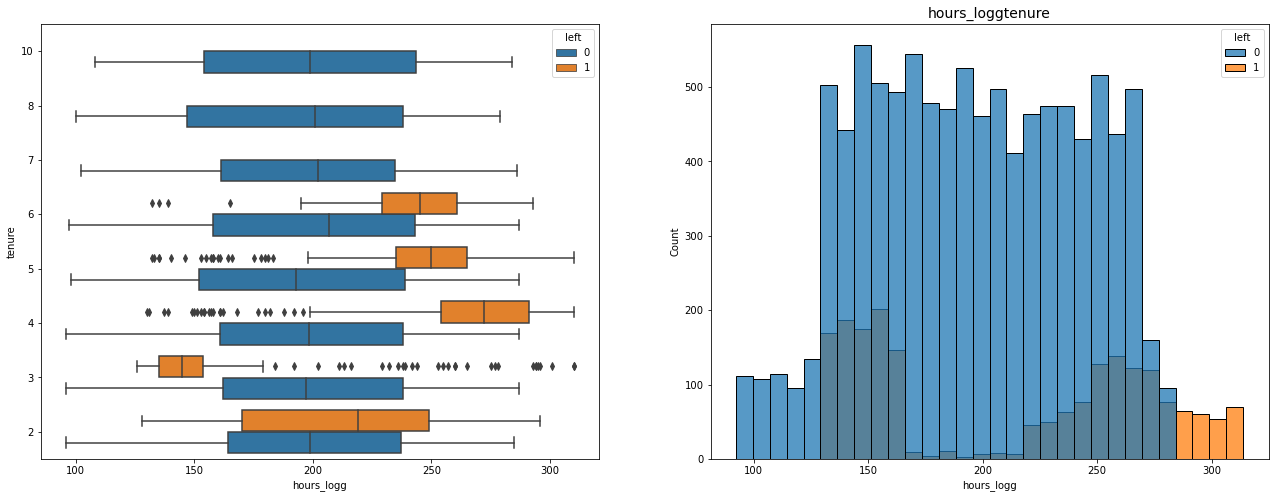

In [25]:
# Create a plot as needed
### YOUR CODE HERE ###
box_hist_pair('eval','tenure')
box_hist_pair('hours_logg','tenure')

2 kinds left. short tenure (<4) less hours logged. not so short tenure more hours logged.
similarly, short tenure, low or average eval and long tenure, higher than average eval.

In [26]:
df1.head(2)

satisfaction  eval  involvements  hours_logg  tenure  Work_accident  left  \
0          0.38  0.53             2         157       3              0     1   
1          0.80  0.86             5         262       6              0     1   

   promotion_last_5years Department  salary  
0                      0      sales     low  
1                      0      sales  medium

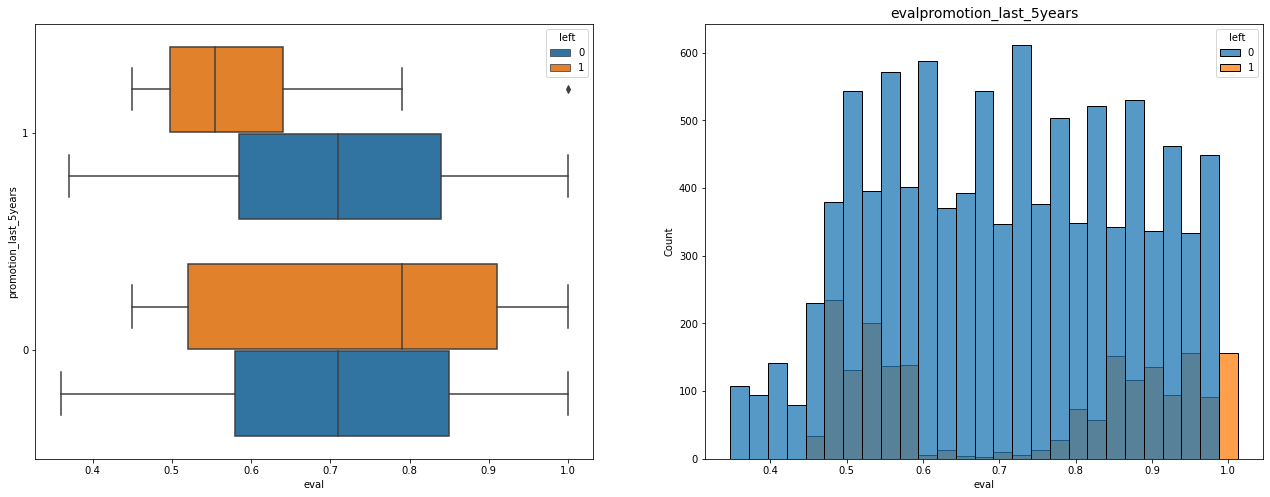

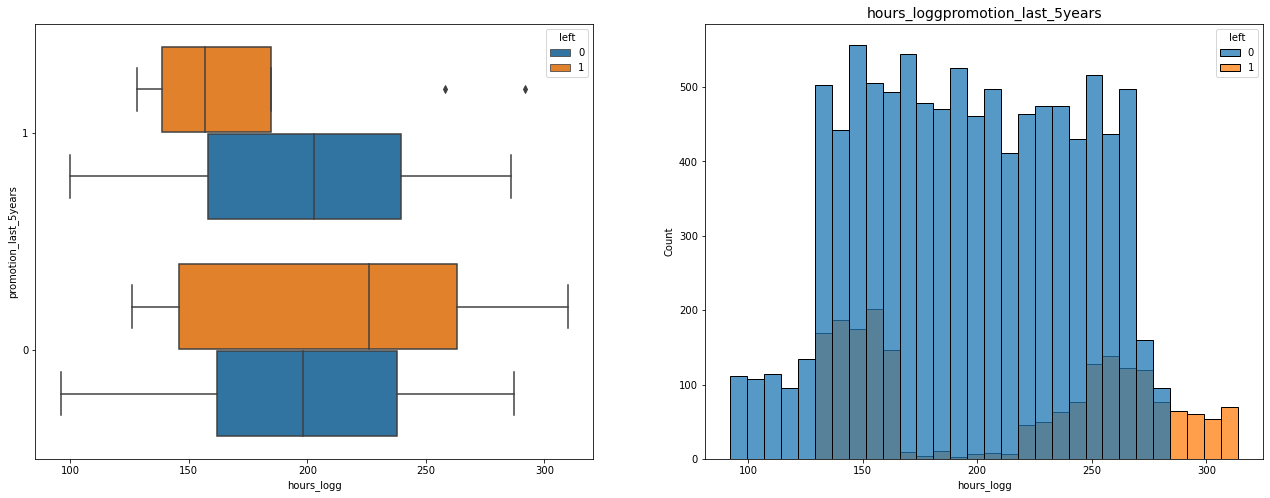

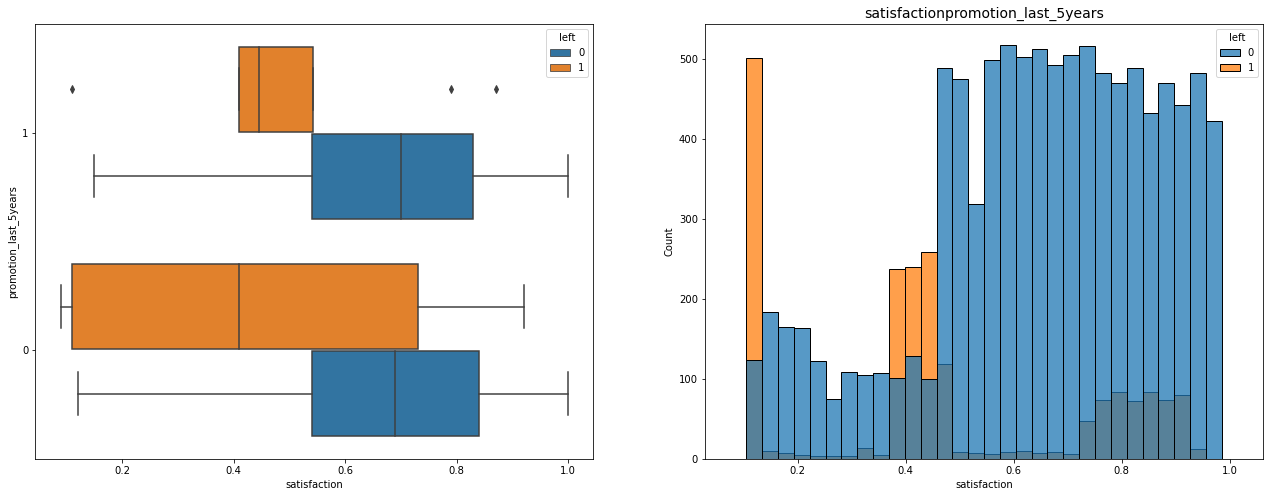

In [27]:
box_hist_pair('eval','promotion_last_5years')
box_hist_pair('hours_logg','promotion_last_5years')
box_hist_pair('satisfaction', 'promotion_last_5years')

those who didnt get promotion, were less satisfied, left. 

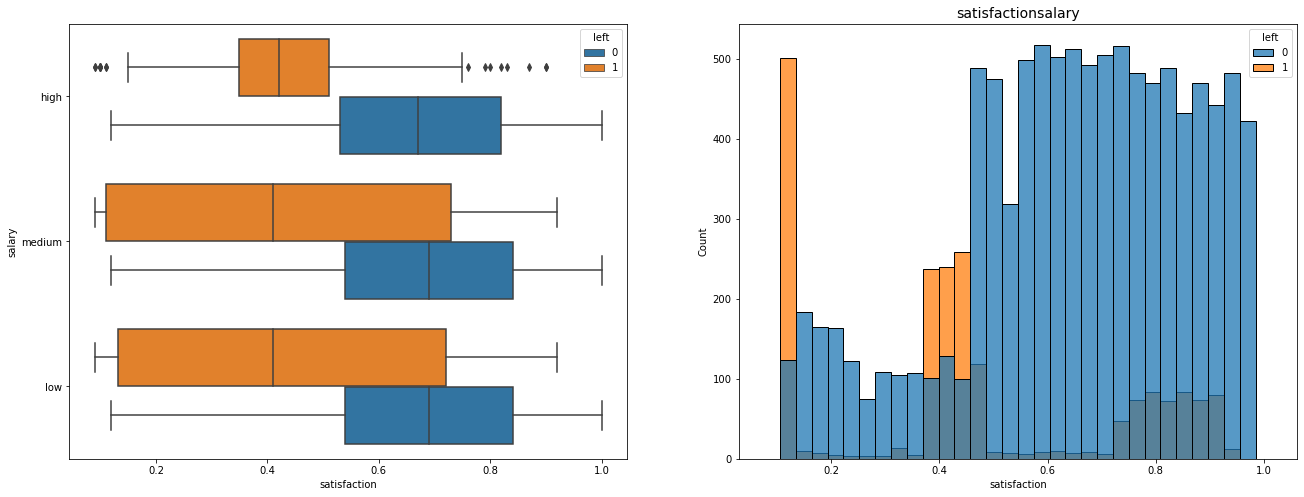

In [28]:
box_hist_pair('satisfaction','salary')


low or medium salary are less satisfied and left. 

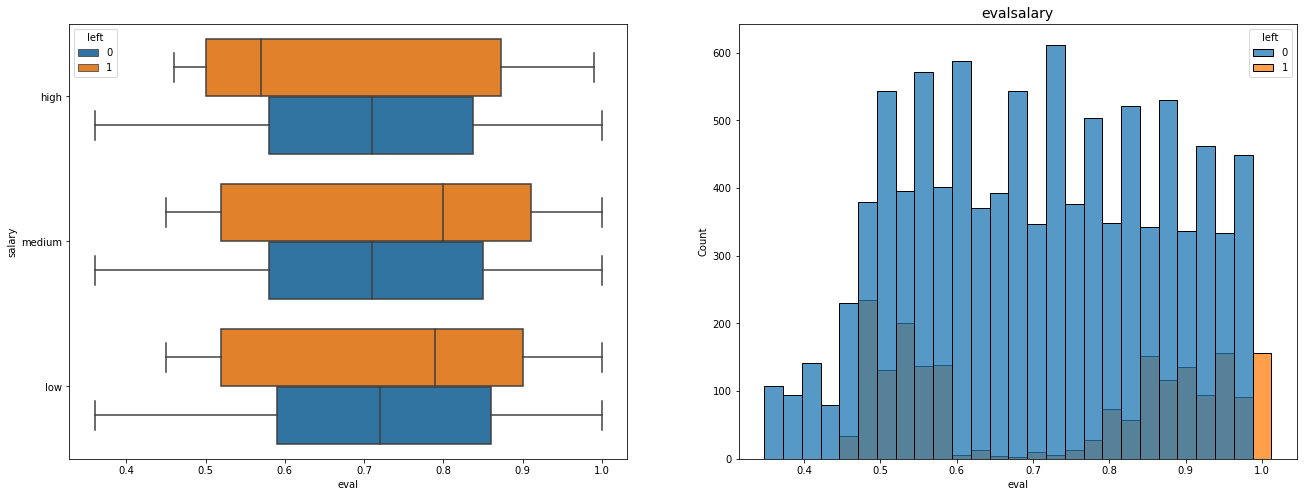

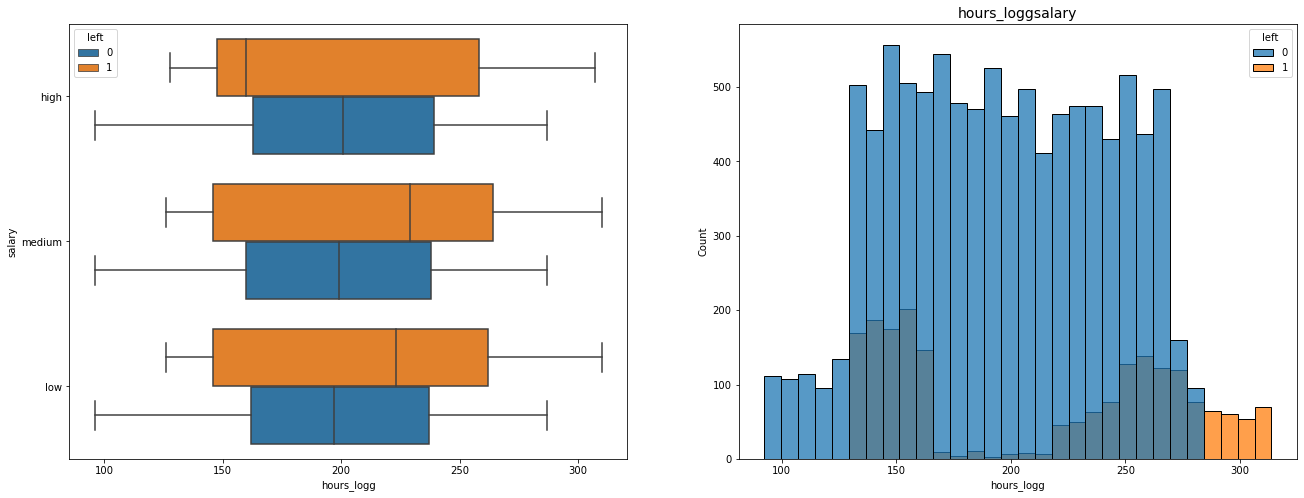

In [29]:
box_hist_pair('eval','salary')
box_hist_pair('hours_logg','salary')

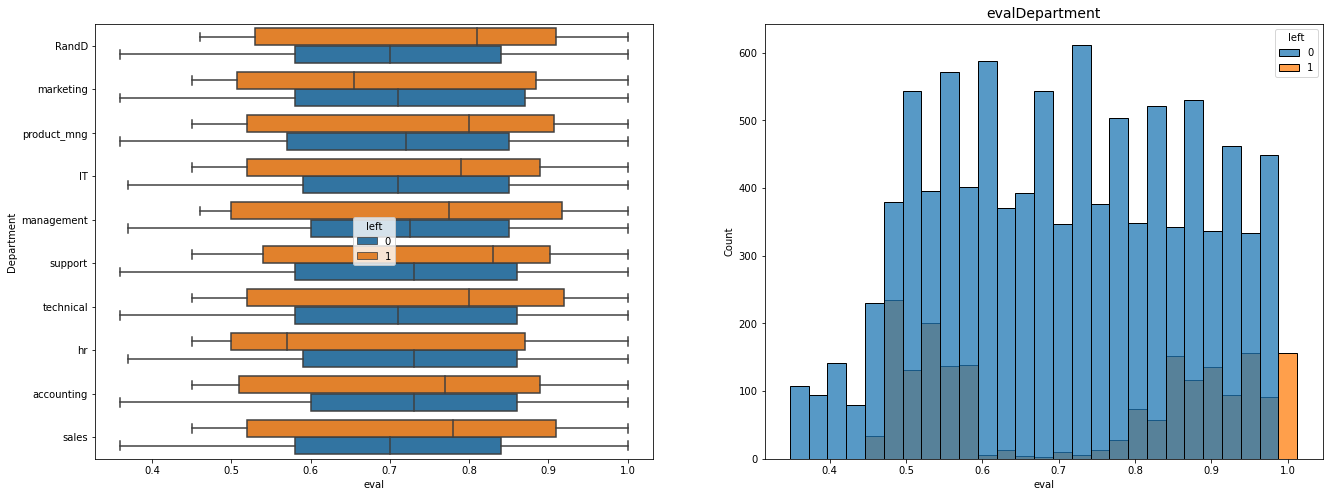

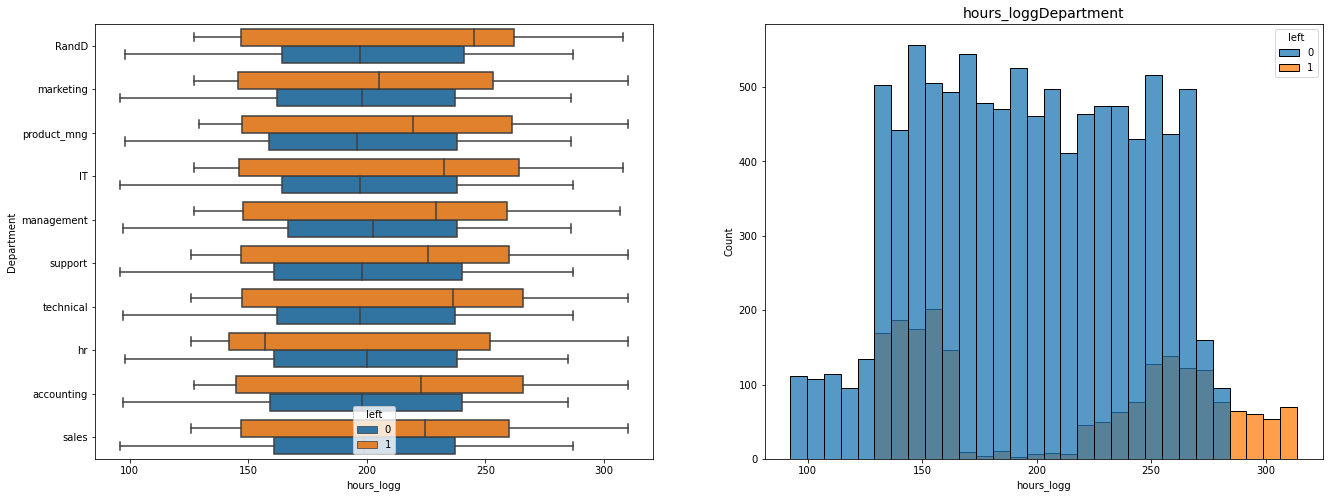

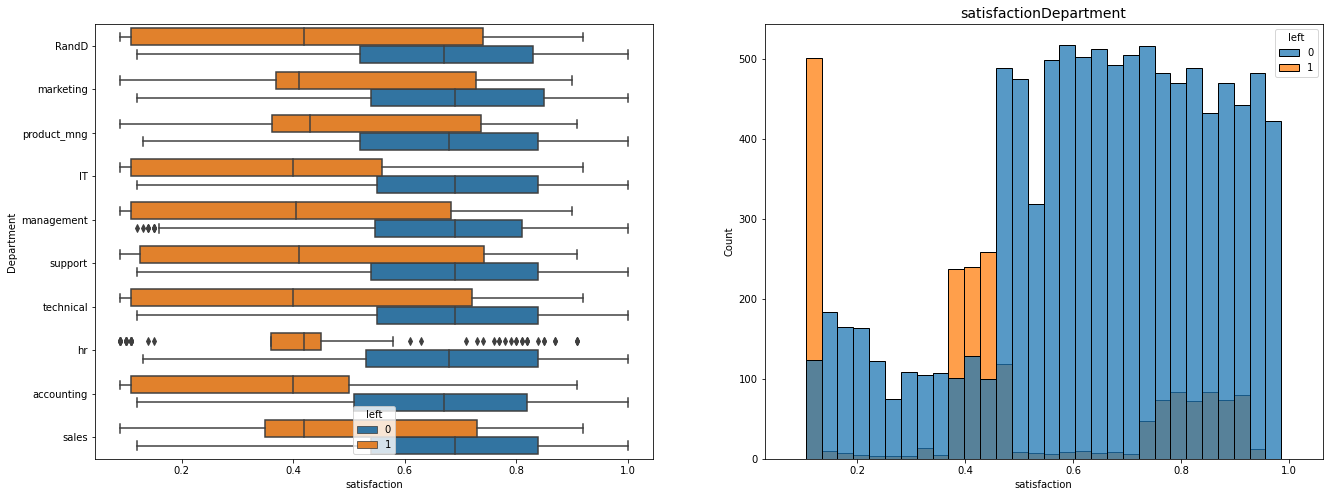

In [30]:
box_hist_pair('eval','Department')
box_hist_pair('hours_logg','Department')
box_hist_pair('satisfaction','Department')

General trends in low satisfaction custs leaving. RandD, IT, Management, support, technical, acc are some where more left than other departments.

## Compared each of categorical with continous with outcome as a color code. Now, compare continous (scatterplot)

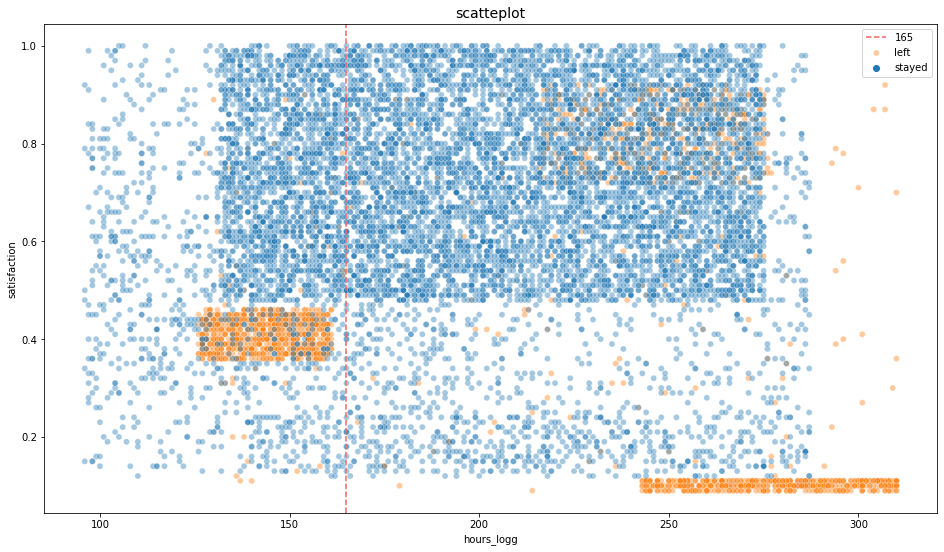

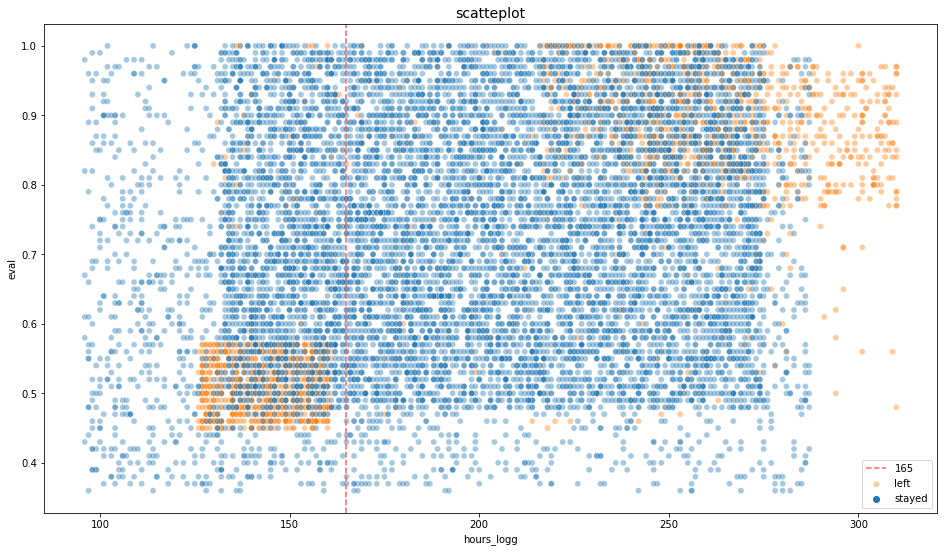

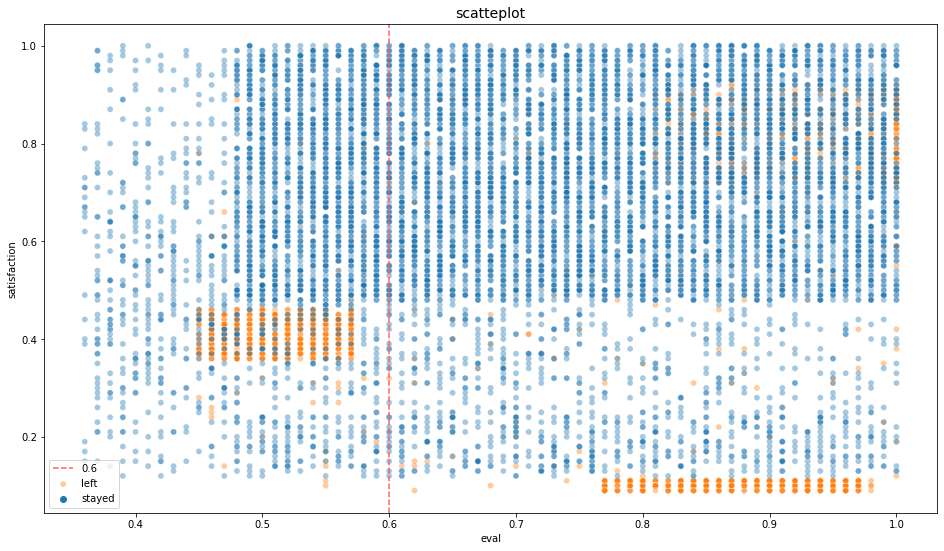

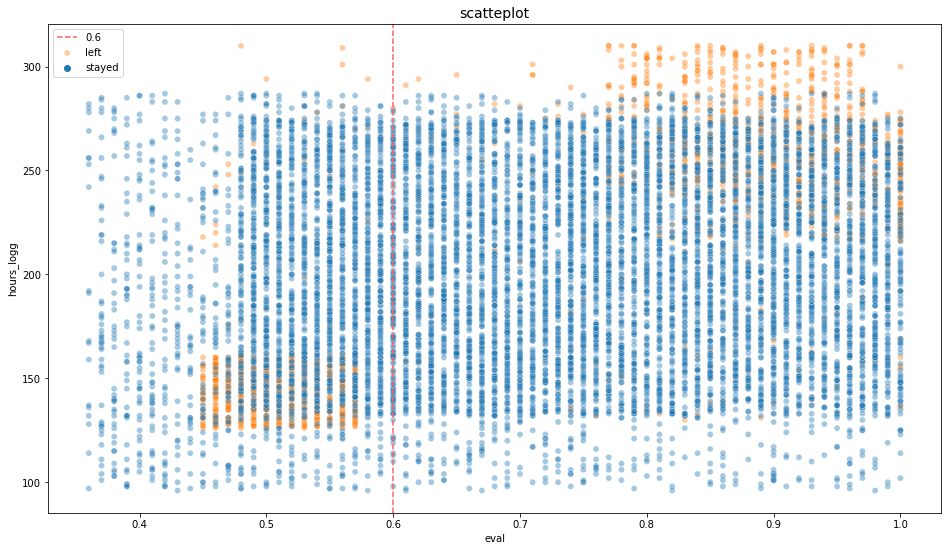

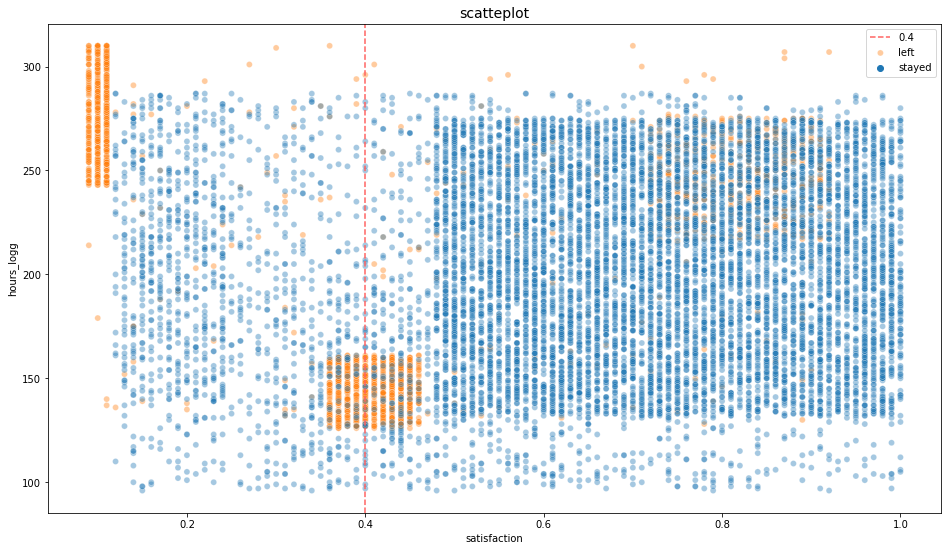

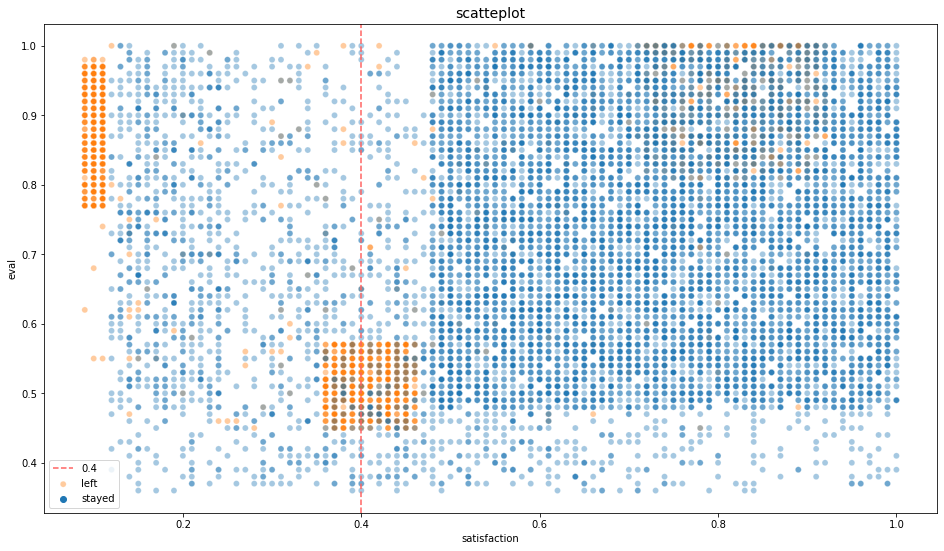

In [32]:
mean_vals = {"eval":0.6,
            "satisfaction":0.4,
             "hours_logg":165
            }
def plot_scat(X,Y):
    val=mean_vals[X]
    plt.figure(figsize=(16,9))
    sns.scatterplot(data=df1,x=X,y=Y,hue='left',alpha=0.4)
    plt.axvline(x=val,color='#ff6361',ls='--')
    plt.legend(labels=[val, 'left', 'stayed'])
    plt.title('scatteplot', fontsize='14');
plot_scat("hours_logg","satisfaction")
plot_scat("hours_logg","eval")
plot_scat("eval","satisfaction")
plot_scat("eval","hours_logg")
plot_scat("satisfaction","hours_logg")
plot_scat("satisfaction","eval")

### Insights

[1. employees with 6 or more projs 'left' compared to ones with lower proj involvments. (LEFT because Overworked most likely). second is those people who worked less hence left. (probably kicked out for less work).
hisplots. One group of people with high hours left, and second group of people who worked less henced kicked out.

2. Involvements and Satisfaction boxplots tell that less satisfied people are those involved in 6 or more projects. As involvements are reduced satisfactions start to be better. There are a few outliers in this case. 
Histplot tells count of less satisfied who left is way more than other . theres a population of lefts at around 0.3 to 0.5. Then theres a population around highly satisfied custs too (these are probably the ones who found a better salary, etc and resigned). 

3.from tenure hist, most people left on or before 6 years completion. What company ploicy might be impactful on this?

4.for first, 2 kinds left: low satisfaction(<0.4), short tenure (<=4). high satisfaction, not a short tenure(>4).

5. 2 kinds left. short tenure (<4) less hours logged. not so short tenure more hours logged.
similarly, short tenure, low or average eval and long tenure, higher than average eval.

6. General trends in low satisfaction custs leaving. RandD, IT, Management, support, technical, acc are some where more left than other departments.

7. low or medium salary are less satisfied and left. 

8. those who didnt get promotion, were less satisfied, left. ]

Now want to investigate relationship between 2 discrete. X axis would contain the dividing one (e.g tenure > 4, tenure <=4, etc). 

In [33]:
mean_vals1 = {"eval":0.65, 
            "satisfaction":0.4,
             "hours_logg":165,
             "tenure":4,
             "involvements":6
            }

Text(0.5, 1.0, 'Salary histogram by tenure: short-tenured people')

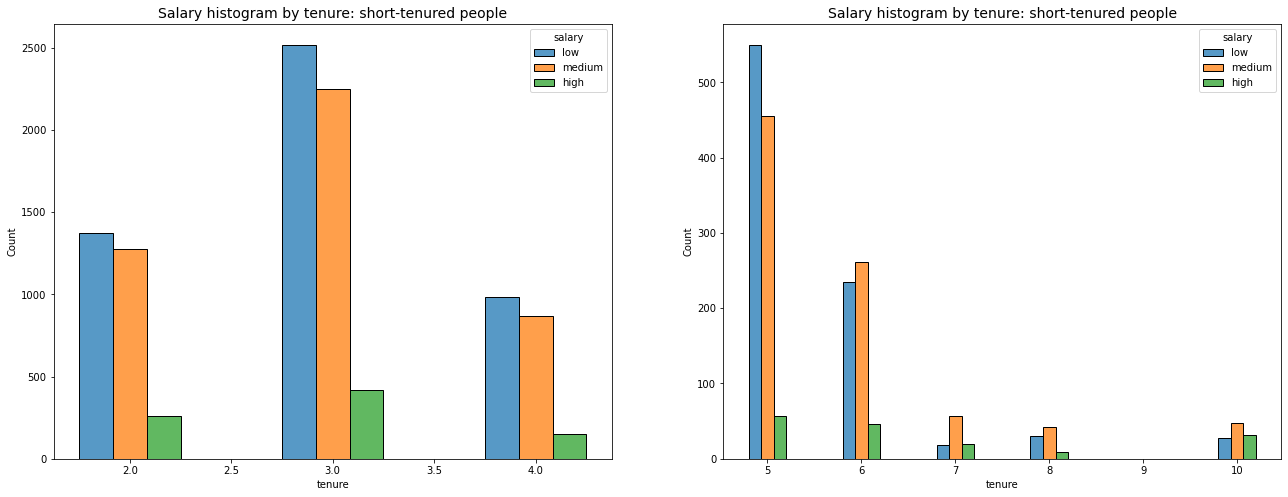

In [34]:
fig,ax = plt.subplots(1,2,figsize =(22,8))

low_evals = df1[df1['eval'] <=0.65]
high_evals = df1[df1['eval'] >0.65]

low_satis = df1[df1['satisfaction'] <= 0.4]
high_satis = df1[df1['satisfaction'] > 0.4]

low_inv = df1[df1['involvements'] <= 4]
high_inv = df1[df1['involvements'] > 4]

low_ten = df1[df1['tenure'] <= 4]
high_ten = df1[df1['tenure'] > 4]

sns.histplot(data=low_ten, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

sns.histplot(data=high_ten, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

Text(0.5, 1.0, 'Salary histogram by inv: high-work people')

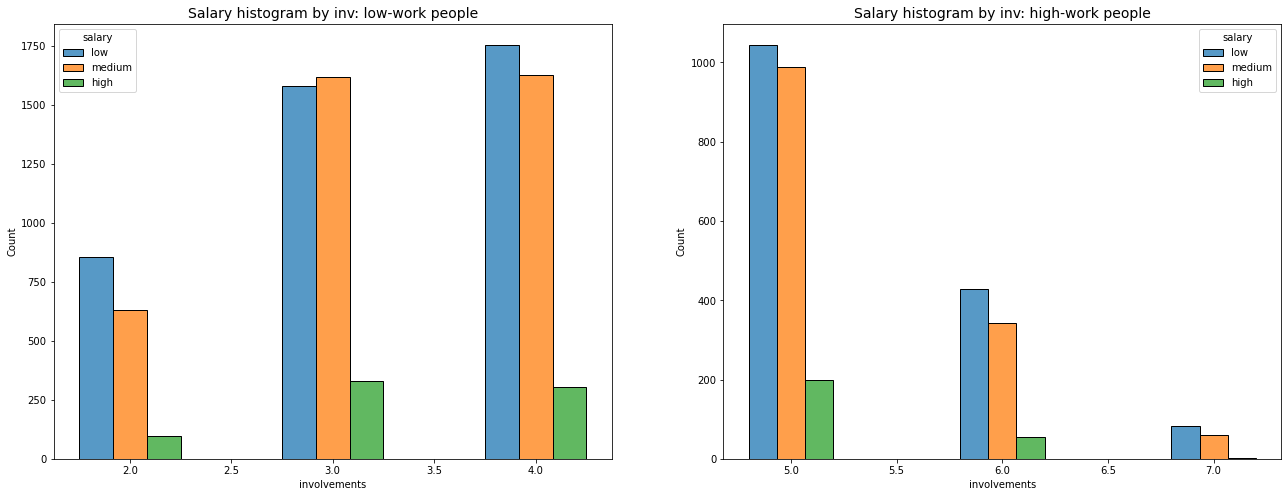

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))
sns.histplot(data=low_inv, x='involvements', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge',shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by inv: low-work people', fontsize='14')

sns.histplot(data=high_inv, x='involvements', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge',shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by inv: high-work people', fontsize='14')

Text(0.5, 1.0, 'Salary histogram by inv: high-work people')

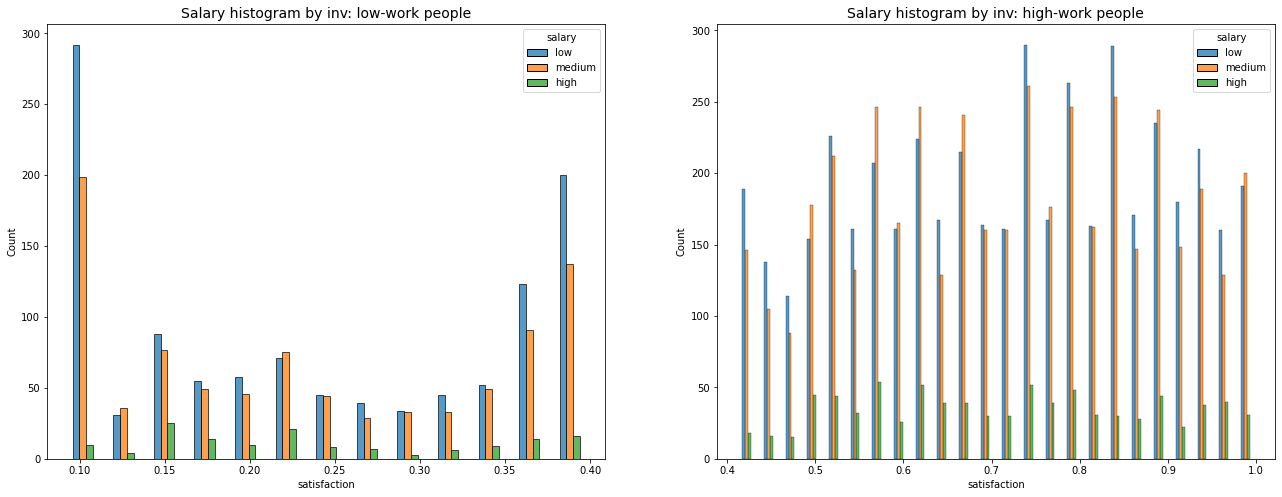

In [36]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))
sns.histplot(data=low_satis, x='satisfaction', hue='salary', discrete=0, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by inv: low-work people', fontsize='14')

sns.histplot(data=high_satis, x='satisfaction', hue='salary', discrete=0, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by inv: high-work people', fontsize='14')

Text(0.5, 1.0, 'Salary histogram by eval: high-eval people')

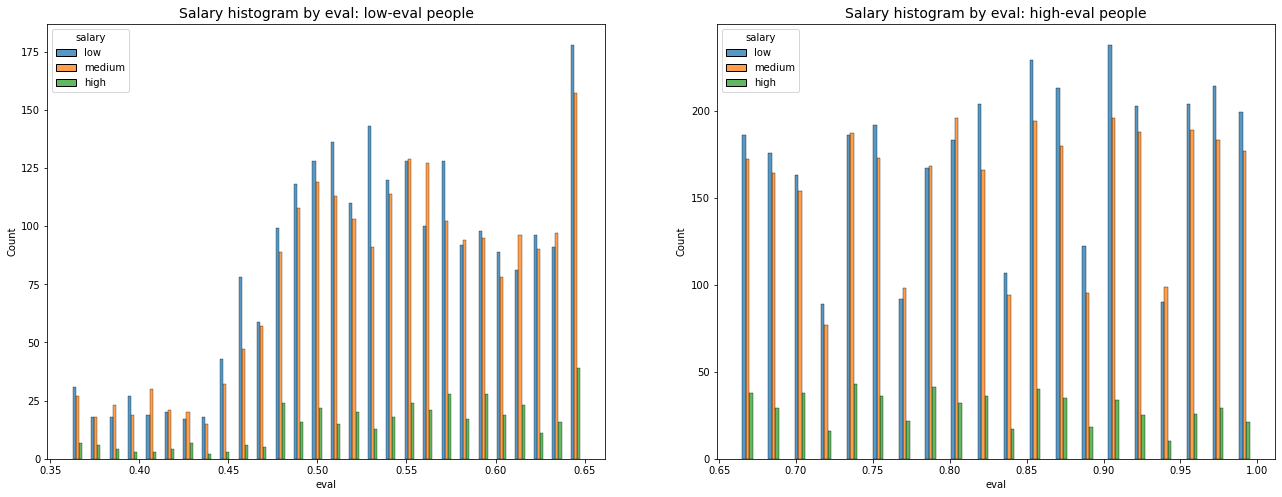

In [37]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))
sns.histplot(data=low_evals, x='eval', hue='salary', discrete=0, 
             hue_order=['low', 'medium', 'high'],multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by eval: low-eval people', fontsize='14')

sns.histplot(data=high_evals, x='eval', hue='salary', discrete=0, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by eval: high-eval people', fontsize='14')

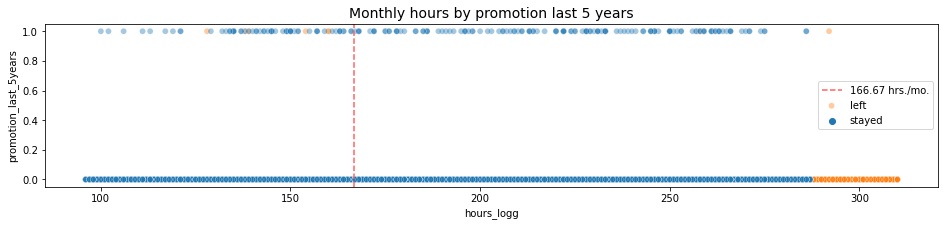

In [38]:
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='hours_logg', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

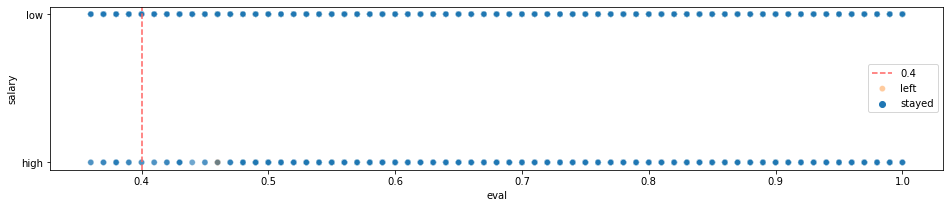

In [39]:
plt.figure(figsize=(16, 3))
low_sal = df1[(df1['salary'] == 'low')|(df1['salary'] == 'high')]
#print(low_sal)
sns.scatterplot(data=low_sal, x='eval', y='salary', hue='left', alpha=0.4)
plt.axvline(x=0.4, color='#ff6361', ls='--')
plt.legend(labels=['0.4', 'left', 'stayed'])
#plt.title('Monthly hours by promotion last 5 years', fontsize='14');

In [40]:
print(df1.columns)

Index(['satisfaction', 'eval', 'involvements', 'hours_logg', 'tenure',
       'Work_accident', 'left', 'promotion_last_5years', 'Department',
       'salary'],
      dtype='object')


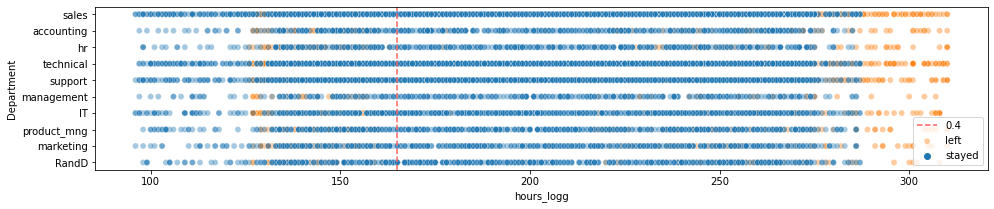

In [41]:
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, y='Department', x='hours_logg', hue='left', alpha=0.4)
plt.axvline(x=165, color='#ff6361', ls='--')
plt.legend(labels=['0.4', 'left', 'stayed'])

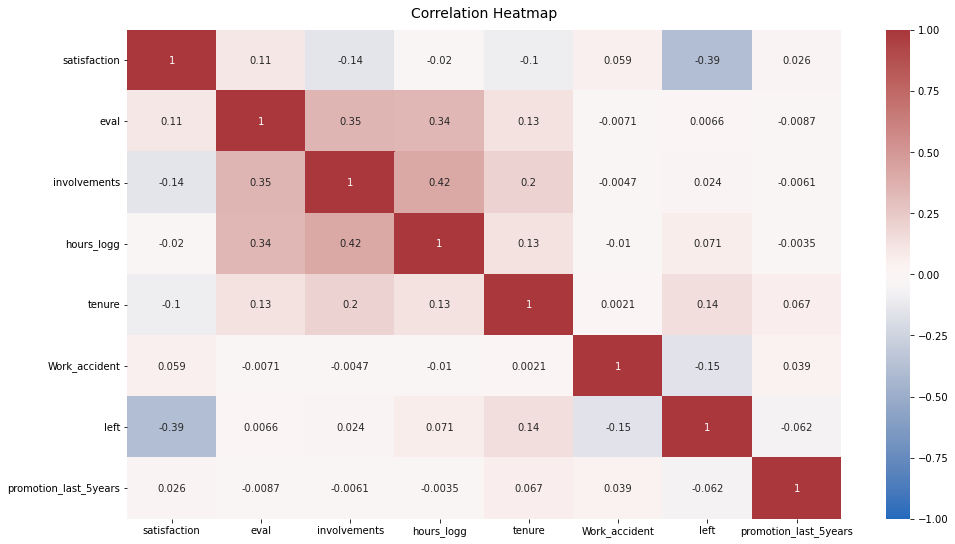

In [42]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

eval,involv, hours, strongly correlated (positive). satisfaction slightly negatively correlated to leaving. 


generally, involvement in more projects, time worked per month is related to satisfaction being low. evaluation reflects its dependence on involv, hours but the main reason that people might be leabving is overworking. Not being promoted, getting low evaluations might be leading to low satisfaction, hence leaving. those with high evaluation, high satisfaction and have left are most likely due to better opportunity elsewhere. from tenure hist, most people left on or before 6 years completion. once they cross 6 year mark, tend not to leave. 

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Want to predict the binomial outcome of Stays or Leaves.Logistic Model best suited. But have to eliminate outliers.

### Modeling

First would prefer to encode variables Department and salary.

In [43]:
### YOUR CODE HERE ###
## Encoding

df_enc = df1.copy()

df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the 'deprtment' column

df_enc = pd.get_dummies(df_enc, drop_first = False)

# Display new df

df_enc.head()

satisfaction  eval  involvements  hours_logg  tenure  Work_accident  left  \
0          0.38  0.53             2         157       3              0     1   
1          0.80  0.86             5         262       6              0     1   
2          0.11  0.88             7         272       4              0     1   
3          0.72  0.87             5         223       5              0     1   
4          0.37  0.52             2         159       3              0     1   

   promotion_last_5years  salary  Department_IT  Department_RandD  \
0                      0       0              0                 0   
1                      0       1              0                 0   
2                      0       1              0                 0   
3                      0       0              0                 0   
4                      0       0              0                 0   

   Department_accounting  Department_hr  Department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   

   Department_marketing  Department_product_mng  Department_sales  \
0                     0                       0                 1   
1                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   

   Department_support  Department_technical  
0                   0                     0  
1                   0                     0  
2                   0                     0  
3                   0                     0  
4                   0                     0

Now its better to make heatmap of all vars (doing now to include encoded variables)

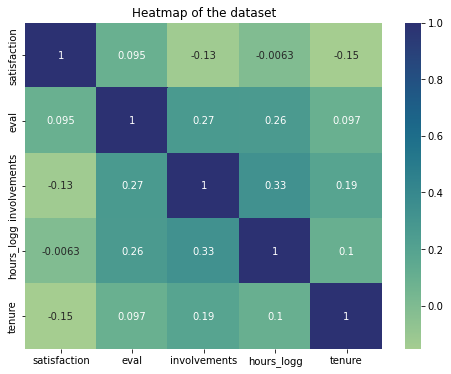

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction', 'eval', 'involvements', 'hours_logg', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

Now for the encoded variables

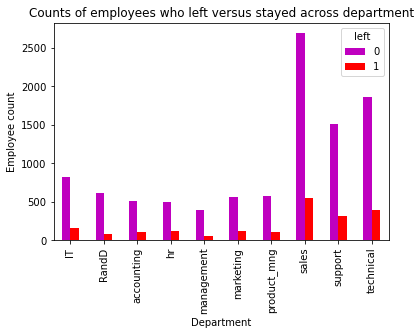

In [45]:
pd.crosstab(df1['Department'], df1['left']).plot(kind ='bar',color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

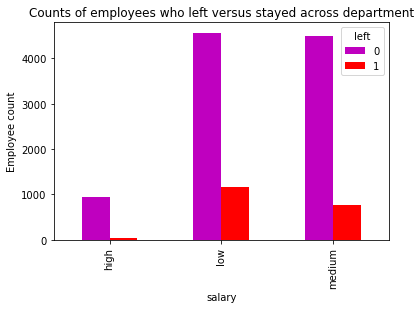

In [46]:
pd.crosstab(df1['salary'], df1['left']).plot(kind ='bar',color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('salary')
plt.show()

Eliminate strong outliers seen previously, so in tenure

In [47]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

satisfaction  eval  involvements  hours_logg  tenure  Work_accident  left  \
0          0.38  0.53             2         157       3              0     1   
2          0.11  0.88             7         272       4              0     1   
3          0.72  0.87             5         223       5              0     1   
4          0.37  0.52             2         159       3              0     1   
5          0.41  0.50             2         153       3              0     1   

   promotion_last_5years  salary  Department_IT  Department_RandD  \
0                      0       0              0                 0   
2                      0       1              0                 0   
3                      0       0              0                 0   
4                      0       0              0                 0   
5                      0       0              0                 0   

   Department_accounting  Department_hr  Department_management  \
0                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   
5                      0              0                      0   

   Department_marketing  Department_product_mng  Department_sales  \
0                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   
5                     0                       0                 1   

   Department_support  Department_technical  
0                   0                     0  
2                   0                     0  
3                   0                     0  
4                   0                     0  
5                   0                     0

Separate the outcome ('left' var)

In [48]:
# Isolate the outcome variable
y = df_logreg['left']

# Display first few rows of the outcome variable
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [49]:
# Select the features you want to use in your model
X = df_logreg.drop('left', axis=1)

# Display the first few rows of the selected features 
X.head()

satisfaction  eval  involvements  hours_logg  tenure  Work_accident  \
0          0.38  0.53             2         157       3              0   
2          0.11  0.88             7         272       4              0   
3          0.72  0.87             5         223       5              0   
4          0.37  0.52             2         159       3              0   
5          0.41  0.50             2         153       3              0   

   promotion_last_5years  salary  Department_IT  Department_RandD  \
0                      0       0              0                 0   
2                      0       1              0                 0   
3                      0       0              0                 0   
4                      0       0              0                 0   
5                      0       0              0                 0   

   Department_accounting  Department_hr  Department_management  \
0                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   
5                      0              0                      0   

   Department_marketing  Department_product_mng  Department_sales  \
0                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   
5                     0                       0                 1   

   Department_support  Department_technical  
0                   0                     0  
2                   0                     0  
3                   0                     0  
4                   0                     0  
5                   0                     0

Data is ready. Now split into training and testing and construct model

In [50]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

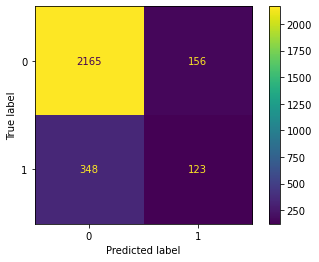

In [55]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

True negatives: 2165
True positives: 123
False positive: 256
False negative: 349
A perfect model would yield all true negatives and true positives.

Check class imbalance (how many positives in data vs negative)

In [89]:
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

In [54]:
# Classification report for logistic regression model.
target_names = ['Wont leave', 'Would leave']
report = classification_report(y_test,y_pred, target_names=target_names)
print(report)

              precision    recall  f1-score   support

  Wont leave       0.86      0.93      0.90      2321
 Would leave       0.44      0.26      0.33       471

    accuracy                           0.82      2792
   macro avg       0.65      0.60      0.61      2792
weighted avg       0.79      0.82      0.80      2792



The model predicts those who wont leave with a precision of 86%, recall of 93%, f1-score of 90%. For those who would leave, precision, recall and f1 scores are lower.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






### Summary of model results

Logistic Regression model performs very well in predicted Employees who wont leave.

### Conclusion, Recommendations, Next Steps

1. My investigation on predicting the employee 'churn' brought out the following insights and recommendations:
- Reducing the Number of Projects per employee will help in solving the problem of overworking.
- Promoting employees on a frequent basis will help with more retention.
- Change company's contractual policies because employees seem to be leaving at around the 4 year mark, unexpectedly.
- Employee evaluations should be more reflective of the efficiency of employees and not only on the basis of hours logged.
- Overworked employees should get adequate remunaration and whould be frequently made aware of overtime policies.